In [ ]:
#Data.csv

**Step 1: Importing the libraries**

In [50]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn import metrics, linear_model, preprocessing
from sklearn.model_selection import train_test_split

**Step 2: Importing dataset**

In [38]:
df = pd.read_csv('/content/Data (1).csv')
df

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes
5,France,35.0,58000.0,Yes
6,Spain,NaN,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


In [7]:
df.Country.unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [8]:
df.Purchased.unique()

array(['No', 'Yes'], dtype=object)

**Step 3: Handling the missing data**

In [17]:
df.isnull().sum()

array([44., 27., 30., 38., 40., 35., nan, 48., 50., 37.])

In [39]:
df.Age.mean()

38.77777777777778

In [40]:
df['Age'] = df.Age.replace(np.nan, df.Age.mean())
df.head()

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes


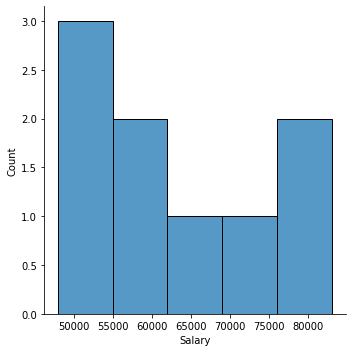

In [25]:
sns.displot(x='Salary',data=df)

In [26]:
df.Salary.mean()

63777.77777777778

In [41]:
df['Salary'] = df.Salary.replace(np.nan, df.Salary.mean())

In [42]:
df.isnull().sum()

Country      0
Age          0
Salary       0
Purchased    0
dtype: int64

**Step 4: Encoding categorical data**

In [43]:
df['Purchased'] = df.Purchased.map({'No':0, 'Yes':1})
df

,Country,Age,Salary,Purchased
0,France,44.000000,72000.000000,0
1,Spain,27.000000,48000.000000,1
2,Germany,30.000000,54000.000000,0
3,Spain,38.000000,61000.000000,0
4,Germany,40.000000,63777.777778,1
5,France,35.000000,58000.000000,1
6,Spain,38.777778,52000.000000,0
7,France,48.000000,79000.000000,1
8,Germany,50.000000,83000.000000,0
9,France,37.000000,67000.000000,1


In [46]:
df

,Age,Salary,Purchased,Country_France,Country_Germany,Country_Spain
0,44.000000,72000.000000,0,1,0,0
1,27.000000,48000.000000,1,0,0,1
2,30.000000,54000.000000,0,0,1,0
3,38.000000,61000.000000,0,0,0,1
4,40.000000,63777.777778,1,0,1,0
5,35.000000,58000.000000,1,1,0,0
6,38.777778,52000.000000,0,0,0,1
7,48.000000,79000.000000,1,1,0,0
8,50.000000,83000.000000,0,0,1,0
9,37.000000,67000.000000,1,1,0,0


**Step 5: Creating a dummy variable**

In [48]:
df = pd.get_dummies(df, prefix=['Country'])

In [49]:
df

,Age,Salary,Purchased,Country_France,Country_Germany,Country_Spain
0,44.000000,72000.000000,0,1,0,0
1,27.000000,48000.000000,1,0,0,1
2,30.000000,54000.000000,0,0,1,0
3,38.000000,61000.000000,0,0,0,1
4,40.000000,63777.777778,1,0,1,0
5,35.000000,58000.000000,1,1,0,0
6,38.777778,52000.000000,0,0,0,1
7,48.000000,79000.000000,1,1,0,0
8,50.000000,83000.000000,0,0,1,0
9,37.000000,67000.000000,1,1,0,0


**Step 6: Splitting the datasets into training sets and Test sets**

In [55]:
x= df.drop('Purchased', axis=1)
y= df[['Purchased']]

x_train, x_test, y_train, y_test =train_test_split(x,y, random_state=0, train_size=0.75)
x_train.shape, x_test.shape

((7, 5), (3, 5))

In [56]:
x_train


,Age,Salary,Country_France,Country_Germany,Country_Spain
9,37.000000,67000.0,1,0,0
1,27.000000,48000.0,0,0,1
6,38.777778,52000.0,0,0,1
7,48.000000,79000.0,1,0,0
3,38.000000,61000.0,0,0,1
0,44.000000,72000.0,1,0,0
5,35.000000,58000.0,1,0,0


**Step 7: Feature Scaling**

In [59]:
scaler = preprocessing.StandardScaler()

scaled_x_train = scaler.fit_transform(x_train) 

print("            Features after feature (Standard scaling) scaling")
scaled_x_train

            Features after feature (Standard scaling) scaling


array([[-0.2029809 ,  0.44897083,  0.8660254 ,  0.        , -0.8660254 ],
       [-1.82168936, -1.41706417, -1.15470054,  0.        ,  1.15470054],
       [ 0.08478949, -1.0242147 , -1.15470054,  0.        ,  1.15470054],
       [ 1.5775984 ,  1.62751925,  0.8660254 ,  0.        , -0.8660254 ],
       [-0.04111006, -0.14030338, -1.15470054,  0.        ,  1.15470054],
       [ 0.93011502,  0.94003267,  0.8660254 ,  0.        , -0.8660254 ],
       [-0.52672259, -0.43494049,  0.8660254 ,  0.        , -0.8660254 ]])

In [63]:
min_max_scaler = preprocessing.MinMaxScaler()

minmax_scaled_x_train = min_max_scaler.fit_transform(x_train)
print("                    Features after min max scaling")
minmax_scaled_x_train

                    Features after min max scaling


array([[0.47619048, 0.61290323, 1.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 1.        ],
       [0.56084656, 0.12903226, 0.        , 0.        , 1.        ],
       [1.        , 1.        , 1.        , 0.        , 0.        ],
       [0.52380952, 0.41935484, 0.        , 0.        , 1.        ],
       [0.80952381, 0.77419355, 1.        , 0.        , 0.        ],
       [0.38095238, 0.32258065, 1.        , 0.        , 0.        ]])

In [62]:
normalizer = preprocessing.Normalizer()

normalized_x_train = normalizer.fit_transform(x_train)

print("                Features after normalization")
normalized_x_train

                Features after normalization


array([[5.52238722e-04, 9.99999847e-01, 1.49253709e-05, 0.00000000e+00,
        0.00000000e+00],
       [5.62499911e-04, 9.99999842e-01, 0.00000000e+00, 0.00000000e+00,
        2.08333300e-05],
       [7.45726288e-04, 9.99999722e-01, 0.00000000e+00, 0.00000000e+00,
        1.92307639e-05],
       [6.07594825e-04, 9.99999815e-01, 1.26582255e-05, 0.00000000e+00,
        0.00000000e+00],
       [6.22950699e-04, 9.99999806e-01, 0.00000000e+00, 0.00000000e+00,
        1.63934394e-05],
       [6.11110997e-04, 9.99999813e-01, 1.38888863e-05, 0.00000000e+00,
        0.00000000e+00],
       [6.03448166e-04, 9.99999818e-01, 1.72413762e-05, 0.00000000e+00,
        0.00000000e+00]])